# Introduction to R and jupyter notebook

In order to illustrate the use of `jupyter notebook` and `R`, let us prepare for the next lecture using a `notebook`.

Notebooks run online (here on [syzygy.ca](syzygy.ca)). It uses two (mainly) types of "cells". A cell like this one is a text cell. Text is formatted using `markdown`, which is a simple text description language yet has relatively powerful capabilities. See [here](https://www.markdownguide.org/getting-started/) for details, for instance.

In [126]:
# This is an R code cell. The sign "#" is used for comments in R, so this line does nothing.

# Grabing the Canadian census data

To illustrate the method, we will consider the evolution of the population of Canada through time. For this, we will grab the census data. We search for "canada historical census data csv", since `csv` (comma separated values) is a very easy format to use with `R`. [Here](https://www150.statcan.gc.ca/n1/pub/11-516-x/sectiona/4147436-eng.htm), we find a `csv` for 1851 to 1976. We follow the link to Table A2-14, where we find another link, this time to a `csv` file. This is what we use in `R`.

The function `read.csv` reads in a file (potentially directly from the web). We assign the result to the variable `data`. We then use the function `head` to show the first few lines in the result.

In [2]:
data_old = read.csv("https://www150.statcan.gc.ca/n1/en/pub/11-516-x/sectiona/A2_14-eng.csv?st=L7vSnqio")
#data_old <- read.csv("https://www150.statcan.gc.ca/n1/en/pub/11-516-x/sectiona/A2_14-eng.csv?st=L7vSnqio")
data_old

X,Series.A2.14.,Population.of.Canada..by.province..census.dates..1851.to.1976,X.1,X.2,X.3,X.4,X.5,X.6,X.7,⋯,X.11,X.12,X.13,X.14,X.15,X.16,X.17,X.18,X.19,X.20
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<lgl>
NA,,,NA,,,NA,,,,⋯,,NA,,NA,,NA,,,NA,NA
NA,Year,Canada,NA,Newfound-,Prince,NA,Nova,New,Quebec,⋯,Saskat-,NA,Alberta,NA,British,NA,Yukon,Northwest,NA,NA
NA,,,NA,land,Edward,NA,Scotia,Brunswick,,⋯,chewan,NA,,NA,Columbia,NA,Territory,Territories,NA,NA
NA,,,NA,,Island,NA,,,,⋯,,NA,,NA,,NA,,,NA,NA
NA,,2,NA,3,4,NA,5,6,7,⋯,10,NA,11,NA,12,NA,13,14,NA,NA
NA,,,NA,,,NA,,,,⋯,,NA,,NA,,NA,,,NA,NA
NA,1976,"22,992,604",NA,"557,725","118,229",NA,"828,571","677,250","6,234,445",⋯,"921,323",NA,"1,838,037",NA,"2,466,608",NA,"21,836","42,609",NA,NA
NA,,,NA,,,NA,,,,⋯,,NA,,NA,,NA,,,NA,NA
NA,1971,"21,568,311",NA,"522,104","111,641",NA,"788,960","634,557","6,027,764",⋯,"926,242",NA,"1,627,874",NA,"2,184,621",NA,"18,388","34,807",NA,NA


Obviously, this does not make a lot of sense. This is normal: take a look at the first few lines in the file. They take the form
```
,Series A2-14.,"Population of Canada, by province, census dates, 1851 to 1976",,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,
,Year,Canada,,Newfound-,Prince,,Nova,New,Quebec,Ontario, Manitoba,,Saskat-,,Alberta,,British,,Yukon,Northwest,,
,,,,land,Edward,,Scotia,Brunswick,,,,,chewan,,,,Columbia,,Territory,Territories,,
,,,,,Island,,,,,,,,,,,,,,,,,
,,2,,3,4,,5,6,7,8,9,,10,,11,,12,,13,14,,
,,,,,,,,,,,,,,,,,,,,,,
```
This happens often: the first few lines are here to set the information. The first line here does this; it is easy to deal with this: the function `read.csv` takes the optional argument `skip=`, which indicates how many lines to skip at the beginning. The second line is also empty, so let us skip it too.

In [6]:
data_old = read.csv("https://www150.statcan.gc.ca/n1/en/pub/11-516-x/sectiona/A2_14-eng.csv?st=L7vSnqio",
                    skip = 2)
data_old

X,Year,Canada,X.1,Newfound.,Prince,X.2,Nova,New,Quebec,⋯,Saskat.,X.4,Alberta,X.5,British,X.6,Yukon,Northwest,X.7,X.8
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<lgl>
NA,,,NA,land,Edward,NA,Scotia,Brunswick,,⋯,chewan,NA,,NA,Columbia,NA,Territory,Territories,NA,NA
NA,,,NA,,Island,NA,,,,⋯,,NA,,NA,,NA,,,NA,NA
NA,,2,NA,3,4,NA,5,6,7,⋯,10,NA,11,NA,12,NA,13,14,NA,NA
NA,,,NA,,,NA,,,,⋯,,NA,,NA,,NA,,,NA,NA
NA,1976,"22,992,604",NA,"557,725","118,229",NA,"828,571","677,250","6,234,445",⋯,"921,323",NA,"1,838,037",NA,"2,466,608",NA,"21,836","42,609",NA,NA
NA,,,NA,,,NA,,,,⋯,,NA,,NA,,NA,,,NA,NA
NA,1971,"21,568,311",NA,"522,104","111,641",NA,"788,960","634,557","6,027,764",⋯,"926,242",NA,"1,627,874",NA,"2,184,621",NA,"18,388","34,807",NA,NA
NA,1966,"20,014,880",NA,"493,396","108,535",NA,"756,039","616,788","5,780,845",⋯,"955,344",NA,"1,463,203",NA,"1,873,674",NA,"14,382","28,738",NA,NA
NA,1961,"18,238,247",NA,"457,853","104,629",NA,"737,007","597,936","5,259,211",⋯,"925,181",NA,"1,331,944",NA,"1,629,082",NA,"14,628","22,998",NA,NA


Here, there is the further issue that to make things legible, the table authors used 3 rows (from 2 to 4) to encode for long names (*e.g.*, Prince Edward Island is written over 3 rows). Note, however, that `read.csv` has rightly picked up on the first row being the column names.

Because we are only interested in the total population of the country and the year, let us simply get rid of the first 4 rows and of all columns except the second (**Year**) and third (**Canada**).

In [7]:
data_old = data_old[5:dim(data_old)[1], 2:3]
data_old

,Year,Canada
,<chr>,<chr>
5,1976,"22,992,604"
6,,
7,1971,"21,568,311"
8,1966,"20,014,880"
9,1961,"18,238,247"
10,1956,"16,080,791"
11,1951,"14,009,429"
12,,
13,1941,"11,506,655"


Still not perfect: 
1. there are some empty rows;
2. the last few rows need to be removed too, they contain remarks about the data;
3. the population counts contain commas;
4. it would be better if years were increasing.

Let us fix these issues. For 1 and 2, this is easy: remark that the **Canada** column is empty for both issues. Now remark as well that below **Canada** (and **Year**, for that matter), it is written **<chr>**. This means that entries in the column are `characters`. Looking for empty content therefore means looking for empty character chains. So we want to keep the rows where **Canada** does not equal the empty chain.

To get rid of commas, we just need to substitute an empty chain for ",".
    
To sort, we find the order for the years and apply it to the entire table.
    
Finally, as remarked above, for now both the year and the population are considered as character chains. This means that in order to plot anything, we will have to indicate that these are numbers, not characters.

In [23]:
data_old = data_old[which(data_old$Canada != ""),]
data_old$Canada = gsub(",", "", data_old$Canada)
order_data = order(data_old$Year)
data_old = data_old[order_data,]
data_old$Year = as.numeric(data_old$Year)
data_old$Canada = as.numeric(data_old$Canada)
data_old

,Year,Canada
,<dbl>,<dbl>
23,1851,2436297
22,1861,3229633
21,1871,3689257
20,1881,4324810
19,1891,4833239
17,1901,5371315
16,1911,7206643
15,1921,8787949
14,1931,10376786


Row numbers are a little weird, so let us fix this.

In [24]:
row.names(data_old) = 1:dim(data_old)[1]
data_old

,Year,Canada
,<dbl>,<dbl>
1,1851,2436297
2,1861,3229633
3,1871,3689257
4,1881,4324810
5,1891,4833239
6,1901,5371315
7,1911,7206643
8,1921,8787949
9,1931,10376786


Well, that looks about right! Let's see what this looks like in a graph.

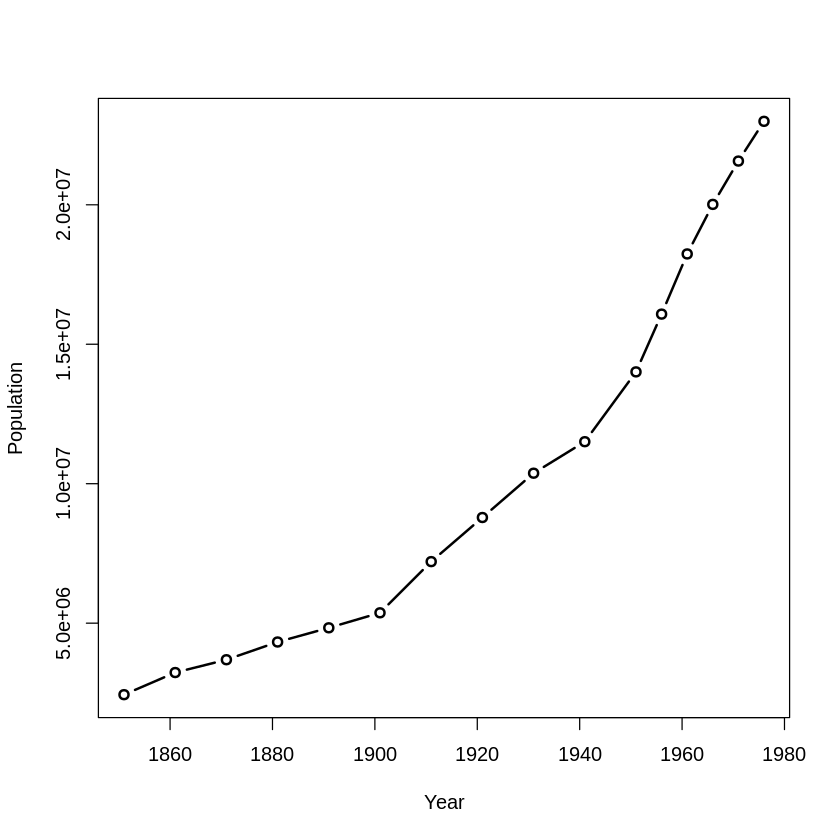

In [25]:
plot(data_old$Year, data_old$Canada,
    type = "b",
    lwd = 2,
    xlab = "Year",
    ylab = "Population")

But wait, this is only to 1976..! Looking around, we find another table [here](https://www12.statcan.gc.ca/census-recensement/2011/dp-pd/vc-rv/index.cfm?LANG=ENG&VIEW=D&TOPIC_ID=1&GEOCODE=01&CFORMAT=html). There's a download csv link in there, let us see where this leads us. The table is 720KB, so surely there must be more to this than just the population. To get a sense of that, we dump the whole data.frame, not just its head.

In [26]:
data_new = read.csv("https://www12.statcan.gc.ca/census-recensement/2011/dp-pd/vc-rv/download-telecharger/download-telecharger.cfm?Lang=eng&CTLG=98-315-XWE2011001&FMT=csv")
data_new

GEOGRAPHY.NAME,CHARACTERISTIC,YEAR.S.,TOTAL,FLAG_TOTAL
<chr>,<chr>,<chr>,<dbl>,<chr>
Canada,Population (in thousands),1956,16081.0,
Canada,Population (in thousands),1961,18238.0,
Canada,Population (in thousands),1966,20015.0,
Canada,Population (in thousands),1971,21568.0,
Canada,Population (in thousands),1976,22993.0,
Canada,Population (in thousands),1981,24343.0,
Canada,Population (in thousands),1986,25309.0,
Canada,Population (in thousands),1991,27297.0,
Canada,Population (in thousands),1996,28847.0,


Haha, this looks quite nice but has way more information than we need (we just want the population of Canada). Also, the population of Canada is expressed in thousands, so once we selected what we want, we will need to multiply by 1,000.

There are many ways to select rows. Let us proceed as follows: we want the rows where the geography is "Canada" and the characteristic is "Population (in thousands)". Let us find those indices of rows that satisfy the first criterion, those that satisfy the second; if we then intersect these two sets of indices, we will have selected the rows we want.

In [30]:
idx_CAN = which(data_new$GEOGRAPHY.NAME == "Canada")
idx_char = which(data_new$CHARACTERISTIC == "Population (in thousands)")
idx_keep = intersect(idx_CAN, idx_char)
idx_keep

[1]  1  2  3  4  5  6  7  8  9 10 11 12

Yes, this looks okay, so let us keep only these.

In [31]:
data_new = data_new[idx_keep,]
data_new

,GEOGRAPHY.NAME,CHARACTERISTIC,YEAR.S.,TOTAL,FLAG_TOTAL
,<chr>,<chr>,<chr>,<dbl>,<chr>
1,Canada,Population (in thousands),1956,16081,
2,Canada,Population (in thousands),1961,18238,
3,Canada,Population (in thousands),1966,20015,
4,Canada,Population (in thousands),1971,21568,
5,Canada,Population (in thousands),1976,22993,
6,Canada,Population (in thousands),1981,24343,
7,Canada,Population (in thousands),1986,25309,
8,Canada,Population (in thousands),1991,27297,
9,Canada,Population (in thousands),1996,28847,


We want to concatenate this data.frame with the one from earlier. To do this, we need the two data frames to have the same number of columns and, actually, the same column names and entry types (notice that **YEAR.S.** in data_new is a column of characters).

So what remains to do:
1. Rename the columns in the pruned old data (data_pruned) to **year** and **population**. Personally, I prefer lowercase column names.. and **population** is more informative than **Canada**.
2. Keep only the relevant columns in data_new, rename them accordingly and multiply population by 1,000 there.
3. Transform year in data_new to numbers.
4. We already have data up to and including 1976 in data_old, so get rid of that in data_new.
5. Append the rows of data_new to those of data_pruned.

In [32]:
colnames(data_old) = c("year", "population")
data_new = data_new[,c("YEAR.S.","TOTAL")]
colnames(data_new) = c("year", "population")
data_new$year = as.numeric(data_new$year)
data_new = data_new[which(data_new$year>1976),]
data_new$population = data_new$population*1000

data = rbind(data_old,data_new)

In [33]:
data

,year,population
,<dbl>,<dbl>
1,1851,2436297
2,1861,3229633
3,1871,3689257
4,1881,4324810
5,1891,4833239
6,1901,5371315
7,1911,7206643
8,1921,8787949
9,1931,10376786


OK, we are ready now!!

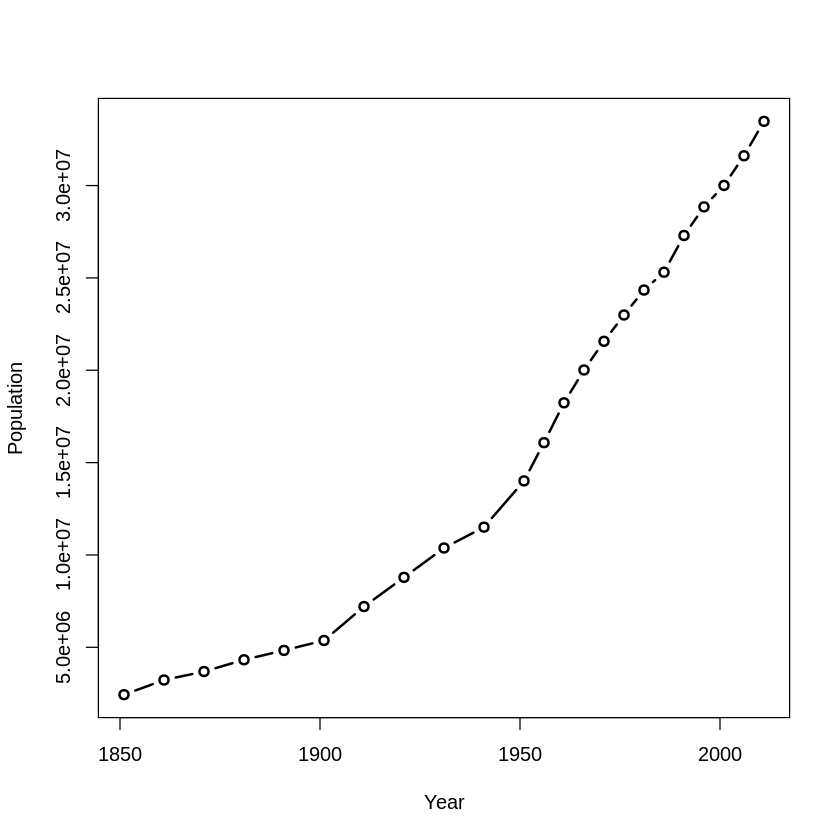

In [34]:
plot(data$year, data$population,
    type = "b",
    lwd = 2,
    xlab = "Year",
    ylab = "Population")

In case we need the data elsewhere, we can save it.

In [36]:
write.csv(data, file = "Canada_census.csv", row.names = FALSE)
saveRDS(data, file = "Canada_census.Rds")